In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pyspark.ml.regression import LinearRegressionModel
from pyspark.ml.feature import VectorAssembler
import os
from pyspark.sql import SparkSession

os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages org.apache.hadoop:hadoop-aws:3.3.4,com.amazonaws:aws-java-sdk-bundle:1.12.262 pyspark-shell'

spark = SparkSession.builder \
    .appName("NYC_Taxi_Check") \
    .master("local[*]") \
    .config("spark.hadoop.fs.s3a.endpoint", "http://localhost:9000") \
    .config("spark.hadoop.fs.s3a.access.key", "minioadmin") \
    .config("spark.hadoop.fs.s3a.secret.key", "minioadmin") \
    .config("spark.hadoop.fs.s3a.path.style.access", "true") \
    .config("spark.hadoop.fs.s3a.impl", "org.apache.hadoop.fs.s3a.S3AFileSystem") \
    .config("spark.hadoop.fs.s3a.connection.ssl.enabled", "false") \
    .getOrCreate()


26/02/02 06:57:06 WARN Utils: Your hostname, neliN resolves to a loopback address: 127.0.1.1; using 10.255.255.254 instead (on interface lo)
26/02/02 06:57:06 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


:: loading settings :: url = jar:file:/home/neli/.local/share/mamba/envs/data-engineering/lib/python3.9/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/neli/.ivy2/cache
The jars for the packages stored in: /home/neli/.ivy2/jars
org.apache.hadoop#hadoop-aws added as a dependency
com.amazonaws#aws-java-sdk-bundle added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-ddc7f6cd-854c-451c-be70-982881a307df;1.0
	confs: [default]
	found org.apache.hadoop#hadoop-aws;3.3.4 in central
	found com.amazonaws#aws-java-sdk-bundle;1.12.262 in central
	found org.wildfly.openssl#wildfly-openssl;1.0.7.Final in central
:: resolution report :: resolve 152ms :: artifacts dl 6ms
	:: modules in use:
	com.amazonaws#aws-java-sdk-bundle;1.12.262 from central in [default]
	org.apache.hadoop#hadoop-aws;3.3.4 from central in [default]
	org.wildfly.openssl#wildfly-openssl;1.0.7.Final from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|

PySparkRuntimeError: [JAVA_GATEWAY_EXITED] Java gateway process exited before sending its port number.

In [2]:
df_spark = spark.read.parquet("s3a://processed-data/nyc_taxi/")
df_pandas = df_spark.limit(10).toPandas()
df_pandas.head(10) 

26/02/02 03:54:48 WARN MetricsConfig: Cannot locate configuration: tried hadoop-metrics2-s3a-file-system.properties,hadoop-metrics2.properties
                                                                                

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,ratecodeid,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,processed_at,year,month
0,2,2015-01-15 20:05:39,2015-01-15 20:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,...,12.0,1.0,0.5,3.25,0.0,0.3,17.05,2026-02-02 03:48:26.992862,2015,1
1,2,2015-01-07 12:59:41,2015-01-07 13:09:22,1,1.74,-74.007034,40.728981,1,N,-73.994598,...,9.0,0.0,0.5,2.25,0.0,0.3,12.05,2026-02-02 03:48:26.992862,2015,1
2,1,2015-01-10 21:33:38,2015-01-10 21:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,...,14.5,0.5,0.5,2.00,0.0,0.3,17.80,2026-02-02 03:48:26.992862,2015,1
3,2,2015-01-07 12:59:41,2015-01-07 13:07:57,1,0.99,-73.983521,40.760555,1,N,-73.992210,...,7.0,0.0,0.5,1.40,0.0,0.3,9.20,2026-02-02 03:48:26.992862,2015,1
4,1,2015-01-10 21:33:38,2015-01-10 21:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,...,9.5,0.5,0.5,0.00,0.0,0.3,10.80,2026-02-02 03:48:26.992862,2015,1
5,2,2015-01-07 12:59:41,2015-01-07 13:13:02,1,1.70,-73.974899,40.777710,1,N,-73.979073,...,10.5,0.0,0.5,0.00,0.0,0.3,11.30,2026-02-02 03:48:26.992862,2015,1
6,1,2015-01-10 21:33:39,2015-01-10 21:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,...,3.5,0.5,0.5,0.00,0.0,0.3,4.80,2026-02-02 03:48:26.992862,2015,1
7,2,2015-01-07 12:59:41,2015-01-07 13:10:22,2,0.49,-73.975426,40.749630,1,N,-73.973488,...,7.5,0.0,0.5,1.50,0.0,0.3,9.80,2026-02-02 03:48:26.992862,2015,1
8,1,2015-01-10 21:33:39,2015-01-10 21:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,...,15.0,0.5,0.5,0.00,0.0,0.3,16.30,2026-02-02 03:48:26.992862,2015,1
9,2,2015-01-07 12:59:41,2015-01-07 13:01:42,1,0.35,-73.961433,40.777176,1,N,-73.958710,...,3.5,0.0,0.5,1.05,0.0,0.3,5.35,2026-02-02 03:48:26.992862,2015,1


In [3]:
stats_spark = df_spark.groupBy("year", "month").count().orderBy("year", "month")
stats_pandas = stats_spark.toPandas()

stats_pandas

,year,month,count
0,2015,1,12748986
1,2016,1,10906858
2,2016,2,11382049
3,2016,3,12210952


Intercept: $4.49
Coefficient for distance: $2.72
Coefficient for passengers: $0.00


Plotting 5000 data points


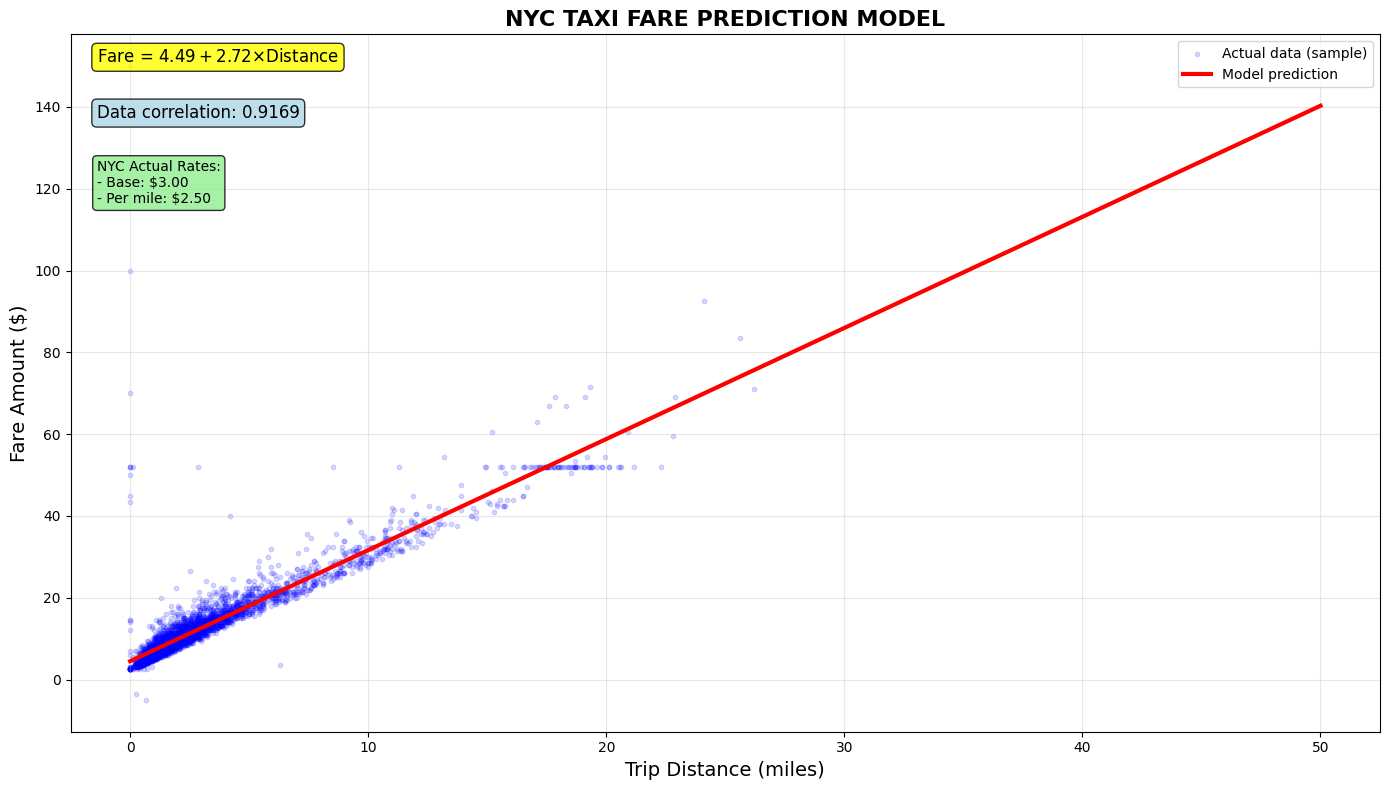


MODEL PREDICTIONS FOR TEST CASES
+--------------------+-------------+---------------+-----------------+
|         description|trip_distance|passenger_count|       prediction|
+--------------------+-------------+---------------+-----------------+
|     Very short trip|          0.5|              1|5.851134534100496|
|          Short trip|          1.0|              1|7.209084549188145|
|        Average trip|          2.0|              1|9.924984579363441|
|         Medium trip|          5.0|              1|18.07268466988933|
|           Long trip|         10.0|              1|31.65218482076581|
|      Very long trip|         20.0|              1|58.81118512251878|
|5 miles, 2 passen...|          5.0|              2|18.07268466988933|
|5 miles, 4 passen...|          5.0|              4|18.07268466988933|
+--------------------+-------------+---------------+-----------------+


MODEL SUMMARY
Base fare (intercept): $4.49
Per-mile rate: $2.72
Per-passenger rate: $0.00

Example calculations:

In [5]:
model = LinearRegressionModel.load("s3a://models/taxi_fare_predictor_v1/")

print(f"Intercept: ${model.intercept:.2f}")
print(f"Coefficient for distance: ${model.coefficients[0]:.2f}")
print(f"Coefficient for passengers: ${model.coefficients[1]:.2f}")

df = spark.read.parquet("s3a://processed-data/nyc_taxi/")
sample_size = min(5000, int(df.count() * 0.001))
plot_sample = df.sample(fraction=0.001, seed=42).limit(sample_size).toPandas()

print(f"Plotting {len(plot_sample)} data points")

assembler = VectorAssembler(
    inputCols=["trip_distance", "passenger_count"],
    outputCol="features"
)
distances = np.linspace(0, 50, 100)  
spark_distances = spark.createDataFrame(
    [(float(d), 1.0) for d in distances],  
    ["trip_distance", "passenger_count"]
)

distance_predictions = model.transform(assembler.transform(spark_distances))
predictions_pdf = distance_predictions.select("trip_distance", "prediction").toPandas()
correlation = plot_sample['trip_distance'].corr(plot_sample['fare_amount'])


plt.figure(figsize=(14, 8))
plt.scatter(plot_sample['trip_distance'], plot_sample['fare_amount'], 
           alpha=0.15, s=10, c='blue', label='Actual data (sample)')
plt.plot(predictions_pdf['trip_distance'], predictions_pdf['prediction'], 
        color='red', linewidth=3, label='Model prediction')
plt.title("NYC TAXI FARE PREDICTION MODEL", fontsize=16, fontweight='bold')
plt.xlabel("Trip Distance (miles)", fontsize=14)
plt.ylabel("Fare Amount ($)", fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()


equation = f"Fare = ${model.intercept:.2f} + ${model.coefficients[0]:.2f}×Distance"
if abs(model.coefficients[1]) > 0.01:
    equation += f" + ${model.coefficients[1]:.2f}×Passengers"

plt.text(0.02, 0.98, equation, 
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

plt.text(0.02, 0.90, f"Data correlation: {correlation:.4f}", 
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.text(0.02, 0.82, "NYC Actual Rates:\n- Base: $3.00\n- Per mile: $2.50", 
         transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
plt.show()


print("\n" + "="*50)
print("MODEL PREDICTIONS FOR TEST CASES")
print("="*50)

test_cases = spark.createDataFrame([
    (0.5, 1, "Very short trip"),
    (1.0, 1, "Short trip"),
    (2.0, 1, "Average trip"),
    (5.0, 1, "Medium trip"),
    (10.0, 1, "Long trip"),
    (20.0, 1, "Very long trip"),
    (5.0, 2, "5 miles, 2 passengers"),
    (5.0, 4, "5 miles, 4 passengers"),
], ["trip_distance", "passenger_count", "description"])

test_predictions = model.transform(assembler.transform(test_cases))
test_predictions.select("description", "trip_distance", "passenger_count", "prediction").show()

#MODEL SUMMARY
print("\n" + "="*50)
print("MODEL SUMMARY")
print("="*50)
print(f"Base fare: ${model.intercept:.2f}")
print(f"Per-mile rate: ${model.coefficients[0]:.2f}")
print(f"Per-passenger rate: ${model.coefficients[1]:.2f}")



In [2]:
# Zelle 1: Importiere sys zuerst
import sys
import os
import subprocess

# Zelle 2: Setze JAVA_HOME
java_path = subprocess.run(['which', 'java'], capture_output=True, text=True).stdout.strip()
print(f"Java binary: {java_path}")

# Berechne JAVA_HOME
java_dir = os.path.dirname(java_path)
java_home_dir = os.path.dirname(java_dir)
os.environ['JAVA_HOME'] = java_home_dir

print(f"JAVA_HOME: {os.environ['JAVA_HOME']}")
!$JAVA_HOME/bin/java -version

# Zelle 3: PySpark Configs
os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

Java binary: /home/neli/.local/share/mamba/envs/data-engineering/bin/java
JAVA_HOME gesetzt auf: /home/neli/.local/share/mamba/envs/data-engineering
openjdk version "24.0.2-internal" 2025-07-15
OpenJDK Runtime Environment (build 24.0.2-internal-adhoc.conda.src)
OpenJDK 64-Bit Server VM (build 24.0.2-internal-adhoc.conda.src, mixed mode, sharing)
SPARK_DRIVER_CLASSPATH: /home/neli/.local/share/mamba/envs/data-engineering/lib/*


NameError: name 'sys' is not defined